In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from MITHRA import *
from MITHRA import plot as plot

In [3]:
import importlib
importlib.reload(plot)
importlib.reload(spec)
importlib.reload(tracks)

<module 'MITHRA.tracks' from '/Users/nichollsh/Projects/MITHRA/MITHRA/tracks.py'>

In [4]:
tr = tracks.read_bhac()

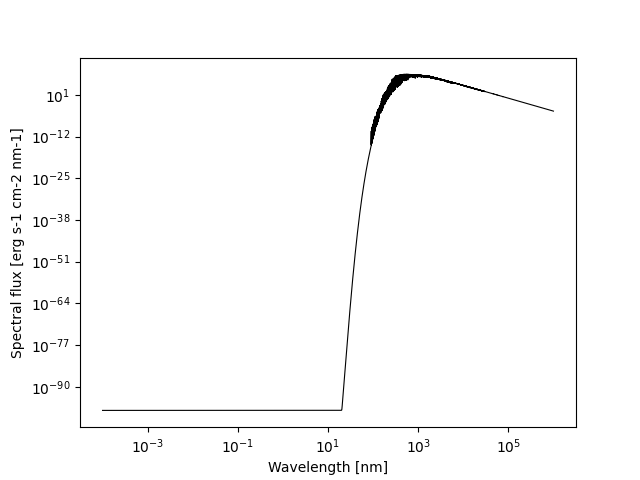

In [5]:
out = tracks.get_params_bhac(tr, 1.0, 1.0e7, ["Teff","logg"])
wl, fl = spec.get_spec_from_npy(out[0], out[1])

%matplotlib widget
plt.close("all")
plot.plot_spectrum(wl,fl)

In [6]:
itp = spec.create_interp(num_wl=80, teff_lims=(2e3, 6e3))

45
7
80
meshgrid...
(45, 7, 80)
interpolate...
done


In [7]:
print(np.shape(itp[0]))

(45, 7, 80)


In [8]:
spec.write_dataset(spec.create_dataset(itp))

In [9]:
v,x,y,z = itp[0],itp[1],itp[2],itp[3]
sh = np.shape(v)

2181.818181818182 3.0


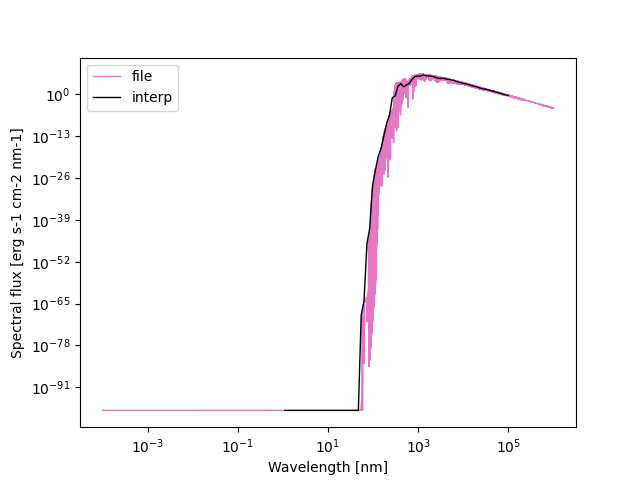

In [10]:
fig,ax = plt.subplots(1,1)

i = 2
j = 1
print(x[i,j,0],y[i,j,0])

wl, fl = spec.get_spec_from_npy(x[i,j,0], y[i,j,0])
ax.plot(wl,fl,label="file", lw=1, color='tab:pink')

ax.plot(z[i,j,:],v[i,j,:],label="interp",lw=1, color='k')

ax.set(xscale="log",yscale="log", xlabel="Wavelength [nm]", ylabel="Spectral flux [erg s-1 cm-2 nm-1]")
ax.legend()
plt.show()

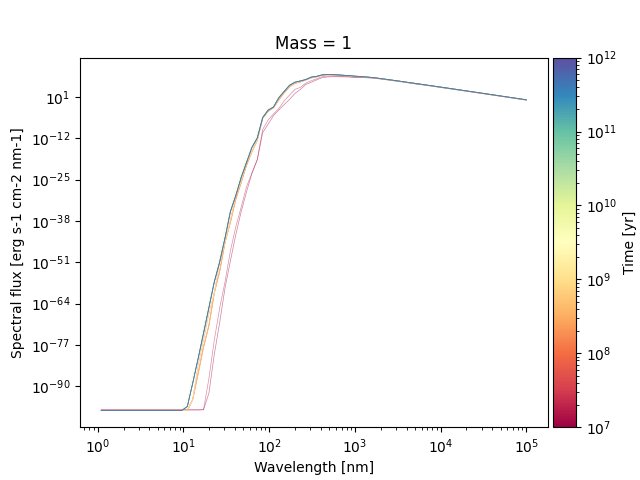

In [11]:
fig,ax = plt.subplots(1,1)

tarr = np.logspace(7,12,20)

mass = 1.0

cmap= plt.cm.Spectral
norm = mpl.colors.LogNorm(vmin=tarr[0], vmax=tarr[-1]) 
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)    
sm.set_array([])  

for time in tarr:

    out = tracks.get_params_bhac(tr, mass, time, ["Teff","logg"])
    
    w,f = spec.get_spec_from_interp((v,x,y,z),out[0],out[1])
    ax.plot(w,f, color=cmap(norm(time)), alpha=0.5, lw=0.5)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(sm, cax=cax, orientation='vertical', label='Time [yr]')  

ax.set(xscale="log", yscale="log")
ax.set(xlabel="Wavelength [nm]", ylabel="Spectral flux [erg s-1 cm-2 nm-1]")
ax.set_title("Mass = %g"%mass)

plt.show()